> Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution

>Fortunately, in real-world problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one

>Reducing dimensionality does lose some information (just like compressing an image to JPEG can degrade its quality), so even though it will speed up training, it may also make your system perform slightly worse

>In some cases, however, reducing the dimensionality of the training data may filter out some noise and unnecessary details and thus result in higher performance (but in general it won’t; it will just speed up training)

# The Curse of Dimensionality

It turns out that many things behave very differently in high-dimensional space

For example, if you pick a random point in a unit square (a 1 × 1 square), it will have only about a 0.4% chance of being located less than 0.001 from a border (in other words, it is very unlikely that a random point will be “extreme” along any dimension)

But in a 10,000-dimensional unit hypercube (a 1 × 1 × × 1 cube, with ten thousand 1s), this . probability is greater than 99.999999%. Most points in a high-dimensional hypercube are very close to the border

Here is a more troublesome difference: if you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66. But what about two points picked randomly in a 1,000,000-dimensional hypercube? Well, the average distance, believe it or not, will be about 408.25 (roughly $\sqrt {1,000,000/6}$

This fact implies that high dimensional datasets are at risk of being very sparse: most training instances are likely to be far away from each other. Of course, this also means that a new instance will likely be far away from any training instance, making predictions much less reliable than in lower dimensions, since they will be based on much larger extrapolations

**In short, the more dimensions the training set has, the greater the risk of overfitting it**

In theory, one solution to the curse of dimensionality could be to increase the size of the training set to reach a sufficient density of training instances. Unfortunately, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions

With just 100 features (much less than in the MNIST problem), you would need more training instances than atoms in the observable universe in order for training instances to be within 0.1 of each other on average, assuming they were spread out uniformly across all dimensions


# Main Approaches for Dimensionality Reduction

let’s take a look at the two main approaches to reducing dimensionality: projection and Manifold Learning

##Projection

In most real-world problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated (as discussed earlier for MNIST)．　As a result, all training instances actually lie within (or close to) a much lower-dimensional subspace of the high-dimensional space

In Figure 8-2 you can see a 3D data set represented by the circles


<p align='center'>
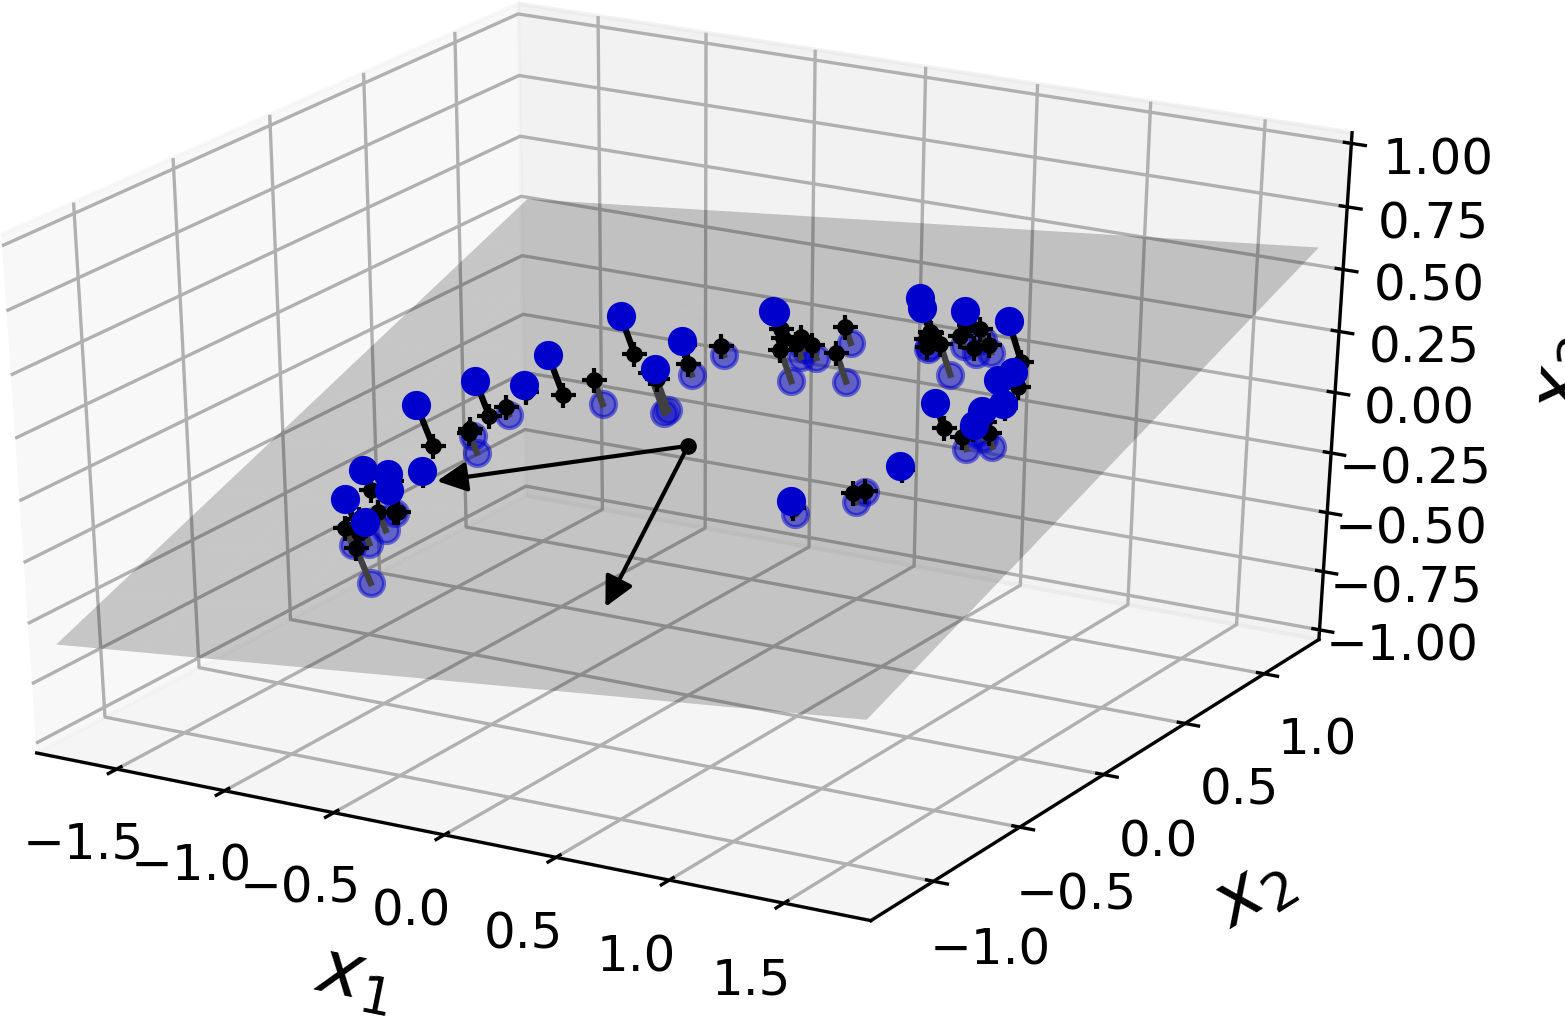
</p>
Figure 8-2. A 3D dataset lying close to a 2D subspace

Notice that all training instances lie close to a plane: this is a lower-dimensional (2D) subspace of the high-dimensional (3D) space

Now if we project every training instance perpendicularly onto this subspace (as represented by the short lines connecting the instances to the plane), we get the new 2D dataset shown in Figure 8-3

Ta-da! We have just reduced the dataset’s dimensionality from 3D to 2D. Note that the axes correspond to new features $z_1$ and $z_2$ (the coordinates of the projections on the plane)



<p align='center'>
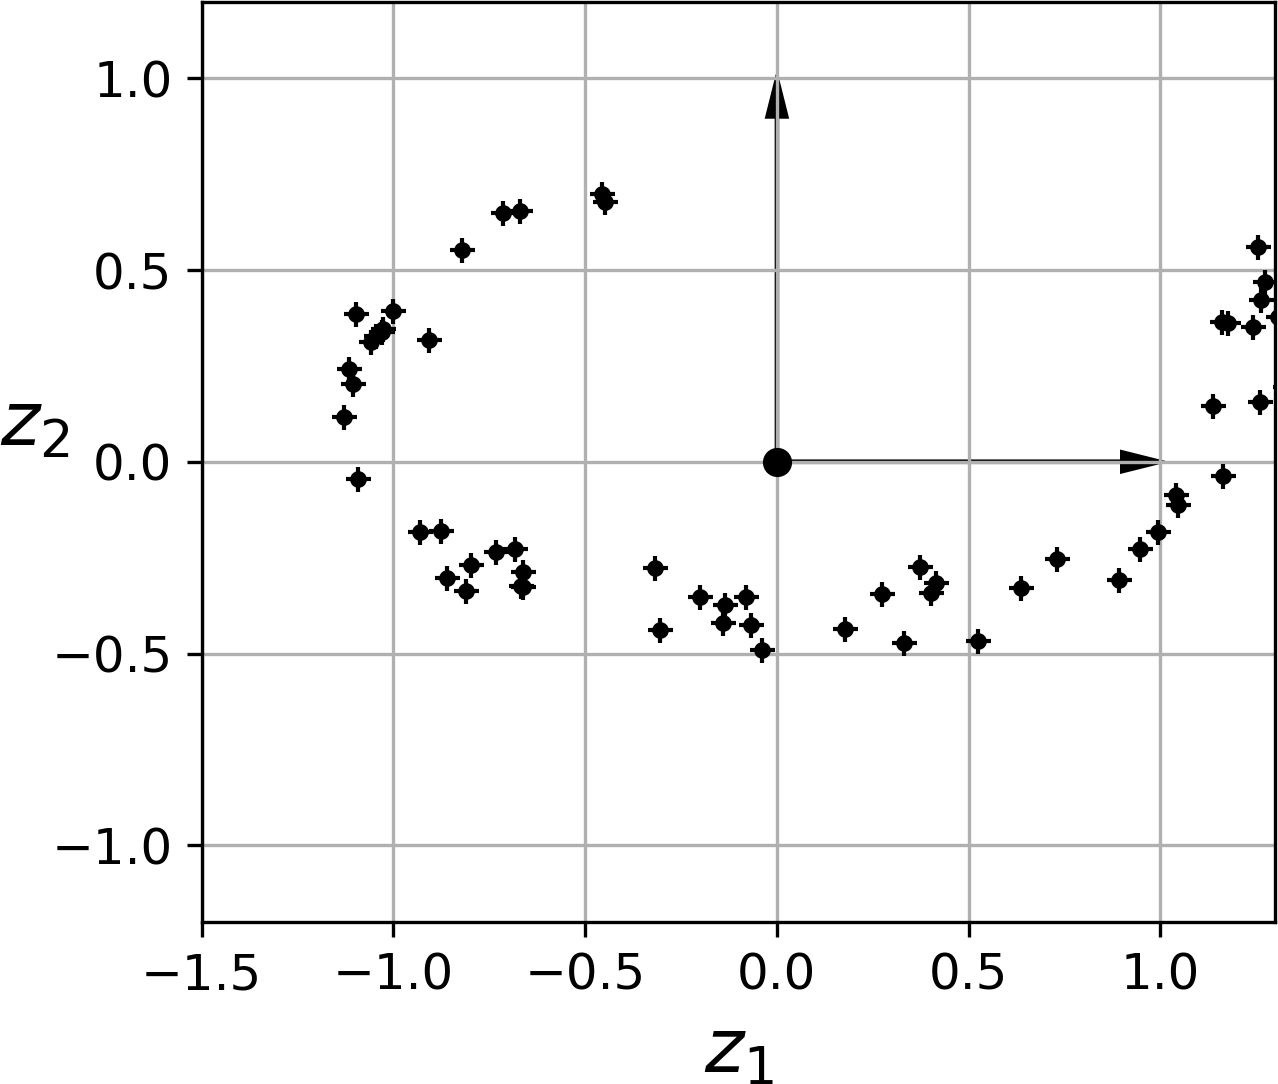
</p>
Figure 8-3. The new 2D dataset after projection

However, projection is not always the best approach to dimensionality reduction. In many cases the subspace may twist and turn, such as in the famous Swiss roll toy dataset represented in Figure 8-4

<p align='center'>
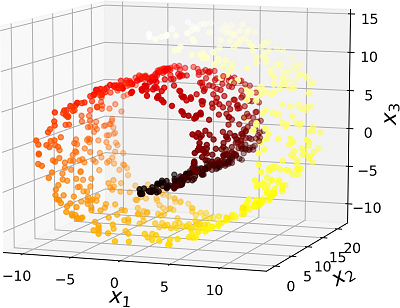
</p>

Figure 8-4. Swiss roll dataset

Simply projecting onto a plane (e.g., by dropping $x_3$) would squash different layers of the Swiss roll together, as shown on the left of Figure 8-5. 

However, what you really want is to unroll the Swiss roll to obtain the 2D dataset on the right of Figure 8-5

<p align='center'>
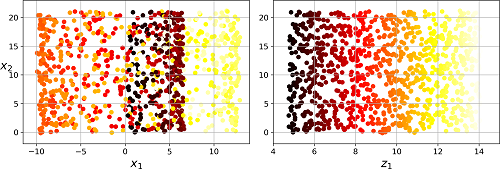
</p>
Figure 8-5. Squashing by projecting onto a plane (left) versus unrolling the Swiss roll (right)

## Manifold Learning

The Swiss roll is an example of a 2D manifold. Put simply, **a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space**

More generally, a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called Manifold Learning. It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed

Once again, think about the MNIST dataset: all handwritten digit images have some similarities. They are made of connected lines, the borders are white, they are more or less centered, and so on. If you randomly generated images, only a ridiculously tiny fraction of them would look like handwritten digits

In other words, the degrees of freedom available to you if you try to create a digit image are dramatically lower than the degrees of freedom you would have if you were allowed to generate any image you wanted. These constraints tend to squeeze the dataset into a lower dimensional manifold












The Swiss roll is an example of a 2D manifold. Put simply, **a 2D manifold is a 2D shape that can be bent and twisted in a higher-dimensional space**

More generally, a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie; this is called Manifold Learning. It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed

Once again, think about the MNIST dataset: all handwritten digit images have some similarities. They are made of connected lines, the borders are white, they are more or less centered, and so on. If you randomly generated images, only a ridiculously tiny fraction of them would look like handwritten digits

In other words, the degrees of freedom available to you if you try to create a digit image are dramatically lower than the degrees of freedom you would have if you were allowed to generate any image you wanted. These constraints tend to squeeze the dataset into a lower dimensional manifold

The manifold assumption is often accompanied by another implicit assumption: that the task at hand (e.g., classification or regression) will be simpler if expressed in the lower-dimensional space of the manifold

For example, in the top row of Figure 8-6 the Swiss roll is split into two classes: in the 3D space (on the left), the decision boundary would be fairly complex, but in the 2D unrolled manifold space (on the right), the decision boundary is a simple straight line









<p align='center'>
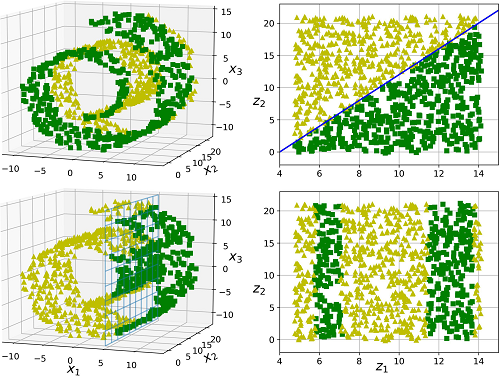
</p>
Figure 8-6. The decision boundary may not always be simpler with lower dimensions

However, this assumption does not always hold. For example, in the bottom row of Figure 8-6, the decision boundary is located at $x_1 = 5$. This decision boundary looks very simple in the original 3D space (a vertical plane), but it looks more complex in the unrolled manifold (a collection of four independent line segments)

In short, if you reduce the dimensionality of your training set before training a model, it will usually speed up training, but it may not always lead to a better or sim pler solution; it all depends on the dataset

# PCA

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. **First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it**, just like in Figure 8-2

## Preserving the Variance

Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane

For example, a simple 2D dataset is represented on the left of Figure 8-7, along with three different axes (i.e., one-dimensional hyperplanes). On the right is the result of the projection of the dataset onto each of these axes

<p align='center'>
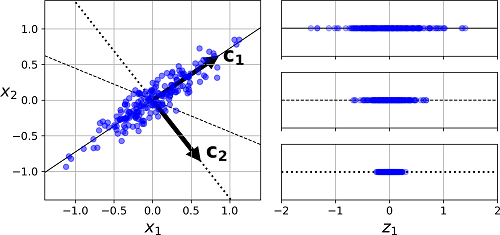
</p>
Figure 8-7. Selecting the subspace onto which to project

It seems reasonable to select the axis that preserves the maximum amount of variance, as it will most likely lose less information than the other projections

Another way to justify this choice is that it is the axis that minimizes the mean squared distance between the original dataset and its projection onto that axis. This is the rather simple idea behind PCA

## Principal Components

PCA identifies the axis that accounts for the largest amount of variance in the training set. In Figure 8-7, it is the solid line. It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance. In Figure 8-7, it is the solid line. It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance

If it were a higher-dimensional data set, PCA would also find a third axis, orthogonal to both previous axes, and a fourth, a fifth, and so on—as many axes as the number of dimensions in the dataset

The unit vector that defines the $i^{th}$ axis is called the $i^{th}$ principal component (PC). In Figure 8-7, the 1st PC is $c_1$ and the 2nd PC is $c_2$ 

In Figure 8-2 the first two PCs are represented by the orthogonal arrows in the plane, and the third PC would be orthogonal to the plane (pointing up or down)







> The direction of the principal components is not stable: if you perturb the training set slightly and run PCA again, some of the new PCs may point in the opposite direction of the original PCs. However, they will generally still lie on the same axes. In some cases, a pair of PCs may even rotate or swap, but the plane they define will generally remain the same

So how can you find the principal components of a training set? Luckily, there is a standard matrix factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix X into the matrix multiplication of three matrices $U \Sigma V^T $, where V contains all the principal components that we are looking for, as shown in Equation 8-1

Equation 8-1. Principal components matrix

$$V = \begin{pmatrix} | & | & \space & | \\ c_1 & c_2 & \dots & c_n \\ | & | & \space & |\end{pmatrix} $$

The following Python code uses NumPy’s svd() function to obtain all the principal components of the training set, then extracts the first two PCs:

In [1]:
#build 3D dataset
import numpy as np
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [2]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [3]:
c1, c2


(array([0.93636116, 0.29854881, 0.18465208]),
 array([-0.34027485,  0.90119108,  0.2684542 ]))

> PCA assumes that the dataset is centered around the origin. As we will see, Scikit-Learn’s PCA classes take care of centering the data for you. However, if you implement PCA yourself or if you use other libraries, don’t forget to center the data first

## Projecting Down to d Dimensions

Once you have identified all the principal components, you can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components

Selecting this hyperplane ensures that the projection will preserve as much variance as possible. For example, in Figure 8-2 the 3D dataset is projected down to the 2D plane defined by the first two principal components, preserving a large part of the dataset’s variance. As a result, the 2D projec tion looks very much like the original 3D dataset

To project the training set onto the hyperplane, you can simply compute the matrix multiplication of the training set matrix $X$ by the matrix $W_{d}$, defined as the matrix containing the first d principal components (i.e., the matrix composed of the first d columns of V), as shown in Equation 8-2

Equation 8-2. Projecting the training set down to d dimensions

$$X_{d-proj} = XW_d$$

The following Python code projects the training set onto the plane defined by the first two principal components

In [4]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

There you have it! You now know how to reduce the dimensionality of any dataset down to any number of dimensions, while preserving as much variance as possible

## Using Scikit-Learn

Scikit-Learn’ class implements PCA using SVD decomposition just like we did PCA before The following code applies PCA to reduce the dimensionality of the dataset down to two dimensions (note that it automatically takes care of centering the data):

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

After fitting the PCA transformer to the dataset, you can access the principal components using the components_ variable 

Note that it contains the PCs as horizontal vectors, so, for example, the first principal component is equal to
```
pca.components_.T[:, 0]
```


In [6]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

Compare to the first two principal components computed using the SVD method:

In [7]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

## Explained Variance Ratio

Another very useful piece of information is the explained variance ratio of each principal component, available via the explained_variance_ratio_ variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component

For example, let’s look at the explained variance ratios of the first two components of the 3D dataset represented in Figure 8-2:




In [8]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

This tells you that 84.2% of the dataset’s variance lies along the first axis, and 14.6% lies along the second axis. This leaves less than 1.2% for the third axis, so it is reasonable to assume that it probably carries little information

## Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is generally preferable to choose the number of dimensions that add up to a sufficiently large portion of the variance (e.g., 95%)

Unless, of course, you are reducing dimensionality for data visualization—in that case you will generally want to reduce the dimensionality down to 2 or 3

The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the training set’s variance

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

You could then set n_components = d and run PCA again. However, there is a much better option: instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve

In [11]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

Yet another option is to plot the explained variance as a function of the number of dimensions (simply plot cumsum; see Figure 8-8)

There will usually be an elbow in the curve, where the explained variance stops growing fast. You can think of this as the intrinsic dimensionality of the dataset. In this case, you can see that reducing the dimensionality down to about 100 dimensions wouldn’t lose too much explained variance



<p align='center'>
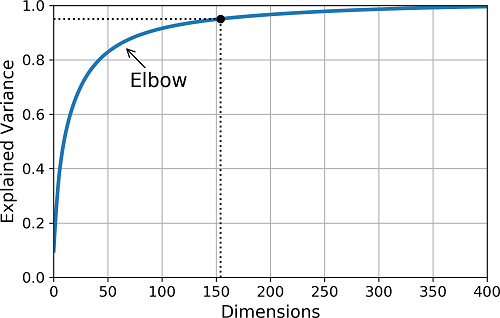
</p>
Figure 8-8. Explained variance as a function of the number of dimensions

##PCA for Compression

Obviously after dimensionality reduction, the training set takes up much less space. For example, try applying PCA to the MNIST dataset while preserving 95% of its var iance. You should find that each instance will have just over 150 features, instead of the original 784 features

So while most of the variance is preserved, the dataset is now less than 20% of its original size

It is also possible to decompress the reduced dataset back to 784 dimensions by applying the inverse transformation of the PCA projection. Of course this won’t give you back the original data, since the projection lost a bit of information (within the 5% variance that was dropped), but it will likely be quite close to the original data

The mean squared distance between the original data and the reconstructed data
(compressed and then decompressed) is called the reconstruction error

For example, the following code compresses the MNIST dataset down to 154 dimensions, then uses the inverse_transform() method to decompress it back to 784 dimensions



In [12]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

Figure 8-9 shows a few digits from the original training set (on the left), and the corresponding digits after compression and decompression. You can see that there is a slight image quality loss, but the digits are still mostly intact

<p align='center'>
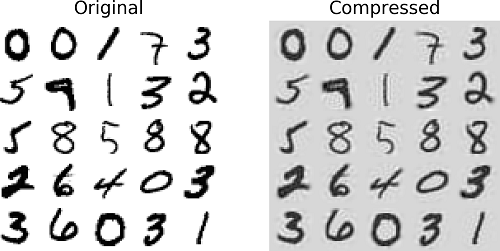
</p>
Figure 8-9. MNIST compression preserving 95% of the variance

The equation of the inverse transformation is shown in Equation 8-3

Equation 8-3. PCA inverse transformation, back to the original number of dimensions

$$ X_{\text{recovered}} = X_{\text{d-proj}} W_d^T $$

## Randomized PCA

**If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a stochastic algorithm called Randomized PCA that quickly finds an approximation of the first d principal components**. Its computational complexity is$O(m \times d^2) + O(d^3)$, instead of $O(m \times n^2) + O(n^3)$ for the full SVD approach, so it is dramatically faster than full SVD when d is much smaller than n:

In [13]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

By default, svd_slover is actually set to "auto": Scikit-Learn automatically uses the randomized PCA algorithm if m or n is greater than 500 and d is less than 80% of m or n, or else it uses the full SVD approach. 

If you want to force Scikit-Learn to use full SVD, you can set the svd_solver hyperparameter to "full"


## Incremental PCA

**One problem with the preceding implementations of PCA is that they require the whole training set to fit in memory in order for the algorithm to run**. Fortunately, Incremental PCA (IPCA) algorithms have been developed: **you can split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time**. This is useful for large training sets, and also to apply PCA online (i.e., on the fly, as new instances arrive)

The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s array_split() function) and feeds them to Scikit-Learn’s IncrementalPCA class to reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like before)

Note that you must call the partial_fit() method with each mini-batch rather than the fit() method with the whole training set:



In [14]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

Alternatively, you can use NumPy’s memmap class, which allows you to manipulate a large array stored in a binary file on disk as if it were entirely in memory; the class loads only the data it needs in memory, when it needs it

Since the IncrementalPCA class uses only a small part of the array at any given time, the menory usage remains under control. This makes it possible to call the usual fit() method, as you can see in the following code




In [15]:
#X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

#batch_size = m // n_batches
#inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
#inc_pca.fit(X_mm)

# Kernel PCA

In Chapter 5 we discussed the kernel trick, a mathematical technique that implicitly maps instances into a very high-dimensional space (called the feature space), enabling nonlinear classification and regression with Support Vector Machines

Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex nonlinear decision boundary in the original space

It turns out that the same trick can be applied to PCA, making it possible to perform complex nonlinear projections for dimensionality reduction. This is called Kernel PCA (kPCA). **It is often good at preserving clusters of instances after projection, or sometimes even unrolling datasets that lie close to a twisted manifold**

For example, the following code uses Scikit-Learn’s KernelPCA class to perform kPCA with an RBF kernel




In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

Figure 8-10 shows the Swiss roll, reduced to two dimensions using a linear kernel (equivalent to simply using the PCA class), an RBF kernel, and a sigmoid kernel (Logistic)

<p align='center'>
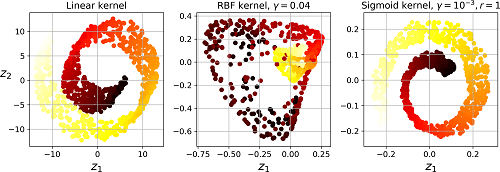
</p>
Figure 8-10. Swiss roll reduced to 2D using kPCA with various kernels

## Selecting a Kernel and Tuning Hyperparameters

As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values

However, dimensionality reduction is often a preparation step for a supervised learning task (e.g., classification), so you can simply use grid search to select the kernel and hyperparameters that lead to the best performance on that task

For example, the following code creates a two-step pipeline, first reducing dimensionality to two dimensions using kPCA, then applying Logistic Regression for classification. Then it uses GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best classification accuract at the end of the pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ('kpca', KernelPCA(n_components=2)),
        ('log_reg', LogisticRegression())
])

param_grid = [{
        'kpca__gamma': np.linspace(0.03, 0.05, 10),
        'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

The best kernel and hyperparameters are then available through the best_params_ variable:

In [ ]:
print(grid_search.best_params_)

**Another approach, this time entirely unsupervised, is to select the kernel and hyperparameters that yield the lowest reconstruction error**

However, reconstruction is not as easy as with linear PCA. Here’s why. Figure 8-11 shows the original Swiss roll 3D dataset (top left), and the resulting 2D dataset after kPCA is applied using an RBF kernel (top right)



<p align='center'>
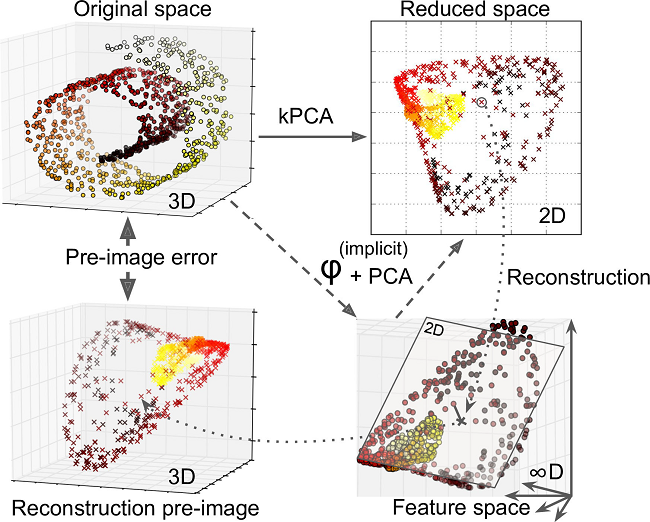
</p>
Figure 8-11. Kernel PCA and the reconstruction pre-image error

Thanks to the kernel trick, this is mathematically equivalent to mapping the training set to an infinite-dimensional feature space (bottom right) using the feature map $\phi$, then projecting the transformed training set down to 2D using linear PCA

Notice that if we could invert the linear PCA step for a given instance in the reduced space, the reconstructed point would lie in feature space, not in the original space (e.g., like the one represented by an x in the diagram). Since the feature space is infinite-dimensional, we cannot compute the reconstructed point, and therefore we cannot compute the true reconstruction error

Fortunately, it is pos sible to find a point in the original space that would map close to the reconstructed point. This is called the reconstruction pre-image. Once you have this pre-image, you can measure its squared distance to the original instance. You can then select the kernel and hyperparameters that minimize this reconstruction pre-image error



You may be wondering how to perform this reconstruction. One solution is to train a supervised regression model, with the projected instances as the training set and the original instances as the targets

Scikit-Learn will do this automatically if you set fit_inverse_transform=True, as shown in the following code

In [ ]:
rbf_pca = KernelPCA(n_components = 2, kernel='rbf', gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

You can then compute the reconstruction pre-image error:

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

# LLE

Locally Linear Embedding (LLE) is another very powerful nonlinear dimensionality reduction (NLDR) technique. It is a Manifold Learning technique that does not rely on projections like the previous algorithms

**In a nutshell, LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved.** This makes it particularly good at unrolling twisted manifolds, especially when there is not too much noise

For example, the following code uses Scikit-Learn’s LocallyLinearEmbedding class to unroll the Swiss roll. The resulting 2D dataset is shown in Figure 8-12

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbours=10)
X_reduced = lle.fit_transform(X)

<p align='center'>
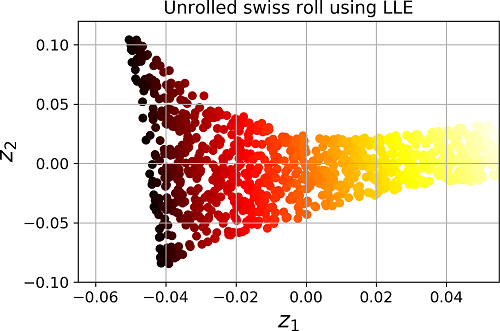
</p>


As you can see, the Swiss roll is completely unrolled and the distances between instances are locally well preserved

However, distances are not preserved on a larger scale: the left part of the unrolled Swiss roll is stretched, while the right part is squeezed. Neverthe less, LLE did a pretty good job at modeling the manifold

Here’s how LLE works: first, for each training instance $x^{(i)}$, the algorithm identifies its k closest neighbors (in the preceding code k = 10), then tries to reconstruct $x^{(i)}$ as a linear function of these neighbours

More specifically, it finds the weights $w_{i, j}$ such that the squared distance between $x^{i}$ and $\sum^m_{j = 1} w_{i, j} x^{(j)}$ is as small as possible, assuming $w_{i, j} = 0 $ if $x^{(j)}$ is not one of the k closest neighbors of $x^{(i)}$

Thus the first step of LLE is the constrained optimization problem described in Equation 8-4, where W is the weight matrix containing all the weights $w_{i, j}$. The second constraint simply normalizes the weights for each training instance $x^{(i)}$

Equation 8-4. LLE step 1: linearly modeling local relationships

$$\hat W = \underset {w}{\text{argmin}} \sum^m_{i = 1} (x^{(i)} - \sum^m_{j = 1} w_{i, j} x^{(j)})^2 \\ \text{ subject to } \begin{cases}w_{i, j} = 0 \space \text{if } x^{(j)} \text{ is not one of the k c.n. of } x^{(i)} \\ \sum^m_{j = 1} w_{i, j} = 1 \text{ for } i = 1, 2, \dots, m \end{cases}  $$

After this step, the weight matrix $\hat W$ (containing the weights $\hat w_{i, j}$)